In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
import skimage.io
from skimage import transform 
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import transform
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

E:\Anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


#      Load Data

In [2]:
mat = scipy.io.loadmat('imagelabels.mat')
lb = mat['labels']

In [3]:
def load_data(data_directory, num_images=None):
    labels = lb[0]
    images = []

    file_names = [f for f in os.listdir(data_directory) if f.endswith(".jpg")]

    if num_images:
        file_names = file_names[:num_images]

    for file_name in file_names:
        file_path = os.path.join(data_directory, file_name)
        img = skimage.io.imread(file_path)
        img_resized=resize(img,(28,28,3))
        images.append(img_resized.flatten())

    return images, labels

In [12]:
dataset , label = load_data('FF')
label = label[:len(dataset)]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.3, random_state= 41)

In [14]:
flat_images = np.array(dataset)

In [15]:
target = np.array(label)

In [16]:
df = pd.DataFrame(flat_images) #dataframe

df['Target'] = target

x_train = df.iloc[:,:-1] #input data 

y_train = df.iloc[:,-1] #output data

In [17]:
flat_images_test = np.array(dataset)
target_test = np.array(label)
df = pd.DataFrame(flat_images_test) #dataframe

df['Target'] = target_test

x_test = df.iloc[:,:-1] #input data 

y_test = df.iloc[:,-1] #output data

# Logistic Regression

In [18]:
# initializing the model and train it
model = LogisticRegression(solver='liblinear')

History = model.fit(x_train,y_train)

#  Calculate Accuracy

In [19]:
y_predict = model.predict(x_test)
from sklearn.metrics import accuracy_score

accuracy_score(y_predict, y_test)

0.9811756935270806

# Confusion Matrix (TP , FT)

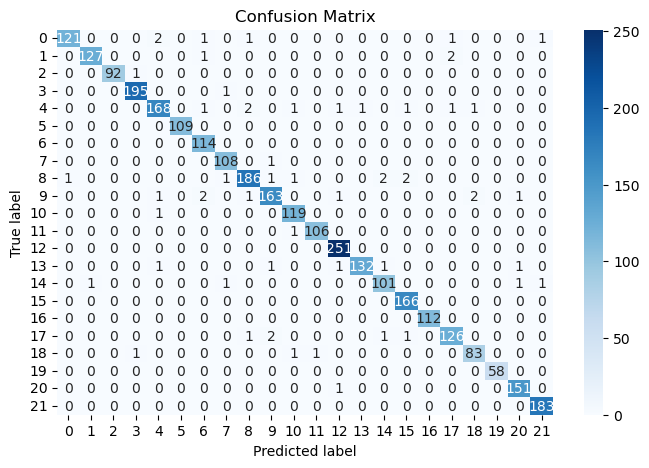

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#  Lose Curve

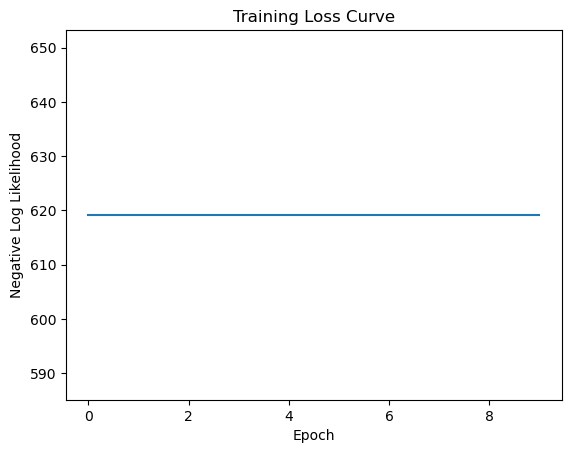

In [14]:
# Initialize the model and train it
model = LogisticRegression(solver='liblinear')

# Lists to store training loss values
train_loss_values = []

# Training loop
for epoch in range(10):  # You can adjust the number of epochs
    model.fit(x_train, y_train)
    
    # Compute and store training loss (Negative Log Likelihood)
    y_prob_train = model.predict_proba(x_train)[:, 1]
    train_loss = -np.sum(y_train * np.log(y_prob_train) + (1 - y_train) * np.log(1 - y_prob_train)) / len(y_train)
    train_loss_values.append(train_loss)


# Plot the loss curve
plt.plot(train_loss_values)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Negative Log Likelihood')
plt.show()


# ROC Curve 

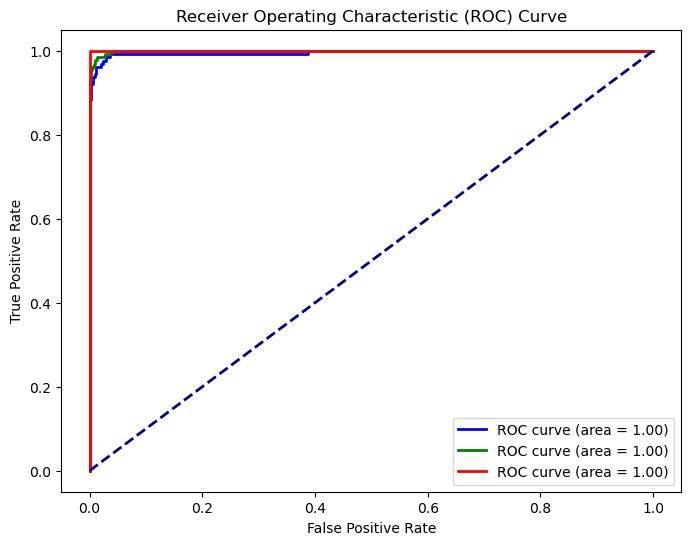

In [37]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Initialize the model using OneVsRestClassifier
model = OneVsRestClassifier(LogisticRegression(solver='liblinear'))

# Train the model
History = model.fit(x_train, y_train_bin)

# Get predicted probabilities for each class
y_prob = model.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']

for i, color in zip(range(len(np.unique(y_train))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
